In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
social = pd.read_csv('Viral_Social_Media_Trends.csv')
social.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [58]:
df = social.copy()
df.shape

(5000, 10)

In [59]:
df[df['Platform']=='Twitter']['Content_Type'] .value_counts()

,count
Content_Type,
Post,221
Tweet,211
Live Stream,206
Reel,202
Video,198
Shorts,166


In [81]:
df.drop(index = df[(df['Platform']=='YouTube') & ((df['Content_Type']=='Tweet') | (df['Content_Type']=='Reel'))].index, inplace = True)

In [82]:
df[df['Platform']=='YouTube']['Content_Type'] .value_counts()

,count
Content_Type,
Post,238
Live Stream,231
Shorts,217
Video,204


In [83]:
df.drop(index = df[(df['Platform']=='Twitter') & ((df['Content_Type']=='Post') | (df['Content_Type']=='Reel') | (df['Content_Type']=='Live Stream') | (df['Content_Type']=='Shorts'))].index, inplace = True)

In [84]:
df[df['Platform']=='Twitter']['Content_Type'] .value_counts()

,count
Content_Type,
Tweet,211
Video,198


In [85]:
df.drop(index = df[(df['Platform']=='Instagram') & ((df['Content_Type']=='Tweet') | (df['Content_Type']=='Live Stream') | (df['Content_Type']=='Shorts') | (df['Content_Type']=='Shorts'))].index, inplace = True)

In [86]:
df[df['Platform']=='Instagram']['Content_Type'] .value_counts()

,count
Content_Type,
Reel,214
Video,212
Post,191


In [87]:
df

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
7,YouTube,#Gaming,Shorts,UK,2066886,317502,45222,33638,High
12,YouTube,#Viral,Shorts,Canada,4105651,195560,37627,49089,High
15,YouTube,#Gaming,Live Stream,Canada,3079923,124237,44062,26702,Medium
...,...,...,...,...,...,...,...,...,...
4992,Twitter,#Viral,Tweet,Brazil,2026985,197746,92346,37291,Low
4995,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low


In [88]:
df.drop('Post_ID', axis = 1, inplace = True)
df

KeyError: "['Post_ID'] not found in axis"

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 2 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Platform          1916 non-null   object
 1   Hashtag           1916 non-null   object
 2   Content_Type      1916 non-null   object
 3   Region            1916 non-null   object
 4   Views             1916 non-null   int64 
 5   Likes             1916 non-null   int64 
 6   Shares            1916 non-null   int64 
 7   Comments          1916 non-null   int64 
 8   Engagement_Level  1916 non-null   object
dtypes: int64(4), object(5)
memory usage: 149.7+ KB


In [90]:
df.isnull().sum()

,0
Platform,0
Hashtag,0
Content_Type,0
Region,0
Views,0
Likes,0
Shares,0
Comments,0
Engagement_Level,0


In [91]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.drop(df[df['Platform'] == 'TikTok'].index, axis = 0, inplace = True)

In [92]:
df['Platform'].value_counts()

,count
Platform,
YouTube,890
Instagram,617
Twitter,409


In [93]:
df.describe()

,Views,Likes,Shares,Comments
count,1.916000e+03,1916.000000,1916.000000,1916.000000
mean,2.491263e+06,255414.945720,50143.828810,24714.982255
std,1.480799e+06,145302.678303,29191.943294,14262.877110
min,5.467000e+03,876.000000,160.000000,32.000000
25%,1.145637e+06,129257.250000,24517.250000,12083.250000
50%,2.492579e+06,258360.000000,49812.500000,25035.000000
75%,3.806586e+06,376454.250000,75176.500000,37041.000000
max,4.999430e+06,499874.000000,99926.000000,49929.000000


In [94]:
df['Platform'].value_counts(normalize = True)

,proportion
Platform,
YouTube,0.464509
Instagram,0.322025
Twitter,0.213466


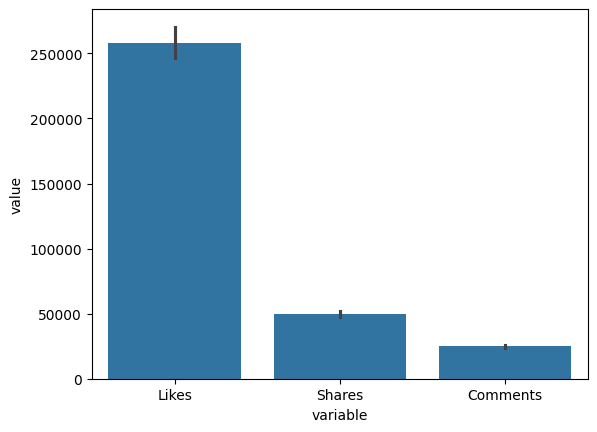

In [95]:
interactions = df[['Likes', 'Shares', 'Comments']]
interactions = pd.melt(interactions)
ax = sns.barplot(x='variable', y='value', data=interactions, estimator = np.median)

<ipython-input-96-adb7e8864e63>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data = interactions, palette = 'bright')


<Axes: xlabel='variable', ylabel='value'>

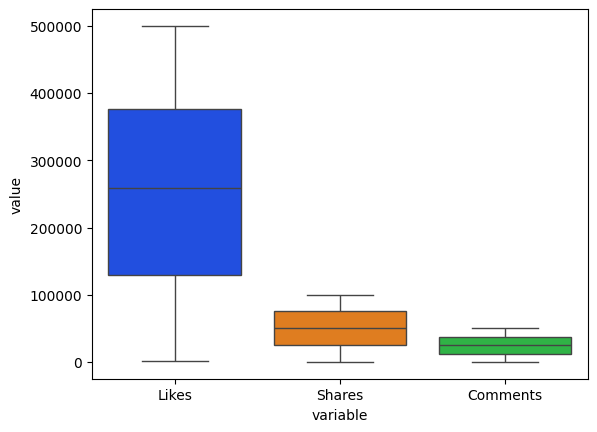

In [96]:
sns.boxplot(x='variable', y='value', data = interactions, palette = 'bright')

<ipython-input-97-01498f0d3fea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[df['Platform']=='YouTube']['Content_Type'], palette = 'bright')
<ipython-input-97-01498f0d3fea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[df['Platform']=='Instagram']['Content_Type'], palette = 'bright')
<ipython-input-97-01498f0d3fea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[df['Platform']=='Twitter']['Content_Type'], palette = 'bright')


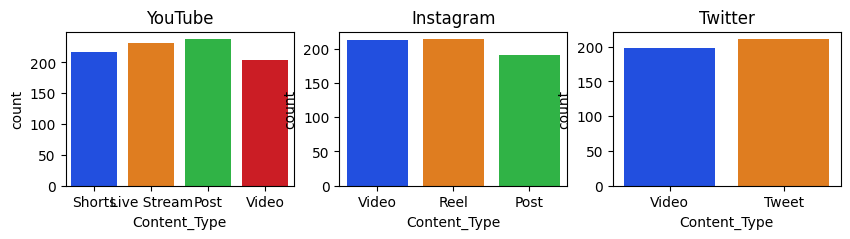

In [97]:
plt.figure(figsize = (10,2))

plt.subplot(1,3,1)
plt.title('YouTube')
sns.countplot(x = df[df['Platform']=='YouTube']['Content_Type'], palette = 'bright')

plt.subplot(1,3,2)
plt.title('Instagram')
sns.countplot(x = df[df['Platform']=='Instagram']['Content_Type'], palette = 'bright')

plt.subplot(1,3,3)
plt.title('Twitter')
sns.countplot(x = df[df['Platform']=='Twitter']['Content_Type'], palette = 'bright')

plt.show()

In [99]:
df.columns

Index(['Platform', 'Hashtag', 'Content_Type', 'Region', 'Views', 'Likes',
       'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [100]:
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
7,YouTube,#Gaming,Shorts,UK,2066886,317502,45222,33638,High
12,YouTube,#Viral,Shorts,Canada,4105651,195560,37627,49089,High
15,YouTube,#Gaming,Live Stream,Canada,3079923,124237,44062,26702,Medium


In [101]:
df['Engagement_Rate'] = (df['Likes'] + df['Shares'] + df['Comments']) / df['Views']

In [106]:
df

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Rate
2,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,0.109865
3,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,0.191315
7,YouTube,#Gaming,Shorts,UK,2066886,317502,45222,33638,High,0.191768
12,YouTube,#Viral,Shorts,Canada,4105651,195560,37627,49089,High,0.068753
15,YouTube,#Gaming,Live Stream,Canada,3079923,124237,44062,26702,Medium,0.063314
...,...,...,...,...,...,...,...,...,...,...
4992,Twitter,#Viral,Tweet,Brazil,2026985,197746,92346,37291,Low,0.161512
4995,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High,0.104595
4996,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium,0.046667
4997,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low,0.070608


In [105]:
df['Engagement_Rate'].describe()

,Engagement_Rate
count,1916.000000
mean,0.527553
std,2.873640
min,0.007652
25%,0.078675
50%,0.129563
75%,0.284188
max,82.506128


In [110]:
df[df['Views']==0]

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Rate


In [111]:
df[df['Engagement_Rate'] > 1]

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Rate
20,Twitter,#Gaming,Video,Brazil,14095,268310,90495,16968,Low,26.660021
36,Instagram,#Music,Reel,Germany,48908,205884,37256,14618,Low,5.270263
57,Twitter,#Dance,Video,Australia,197986,184395,9408,7599,Medium,1.017254
104,Instagram,#Fitness,Post,Japan,13562,11483,33641,30457,Medium,5.572998
218,Twitter,#Dance,Tweet,India,89968,450376,40577,19844,Medium,5.677541
...,...,...,...,...,...,...,...,...,...,...
4845,Twitter,#Dance,Tweet,UK,94208,423135,87349,22463,Low,5.657131
4860,YouTube,#Fashion,Post,Australia,64334,491928,68387,27432,Low,9.135869
4866,YouTube,#Gaming,Live Stream,Canada,107030,428316,72576,23752,Medium,4.901841
4872,Instagram,#Viral,Post,Japan,264350,316213,37185,44016,Medium,1.503363


In [112]:
df.drop(index = df[df['Engagement_Rate'] > 1].index, inplace = True)

In [114]:
df['Engagement_Rate'].describe()

,Engagement_Rate
count,1778.000000
mean,0.188725
std,0.182156
min,0.007652
25%,0.074274
50%,0.120766
75%,0.227388
max,0.989066


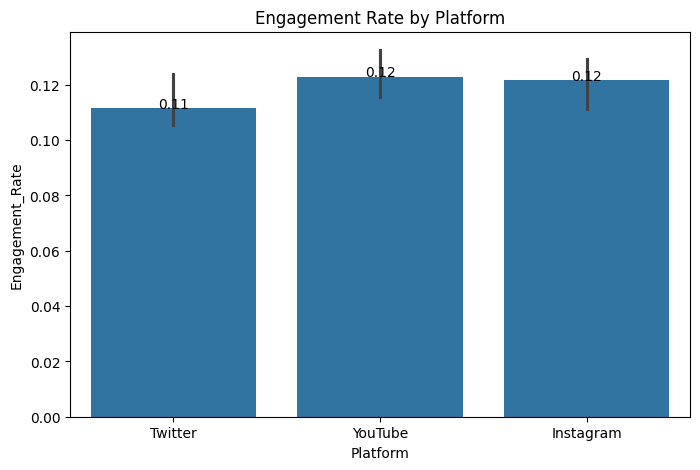

In [120]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Platform', y='Engagement_Rate', data=df, estimator = np.median)
plt.title('Engagement Rate by Platform')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.2f}'.format(p.get_height()),
            ha="center")

plt.show()

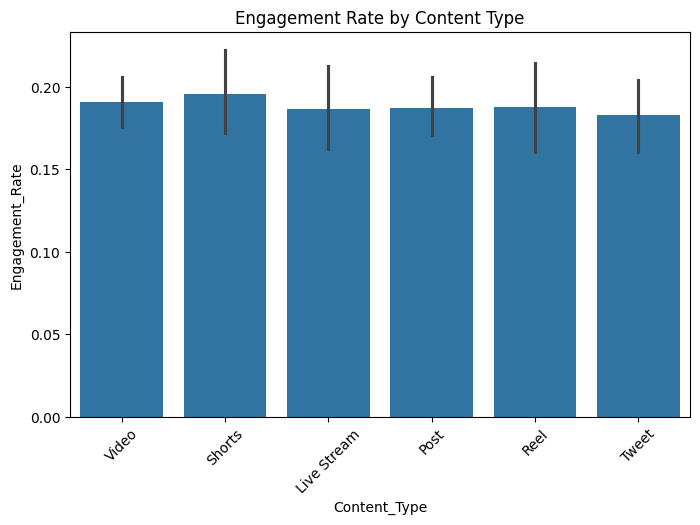

In [126]:
plt.figure(figsize=(8,5))
sns.barplot(x='Content_Type', y='Engagement_Rate', data=df)
plt.title('Engagement Rate by Content Type')
plt.xticks(rotation=45)
plt.show()


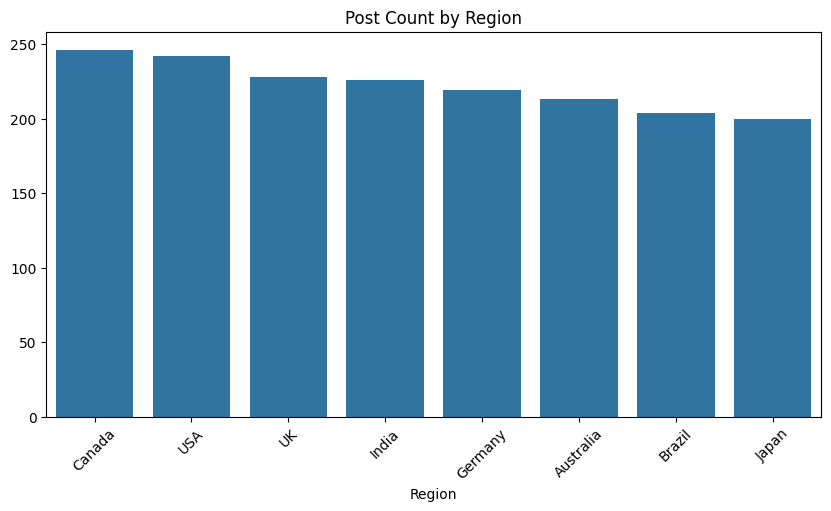

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values)
plt.title('Post Count by Region')
plt.xticks(rotation=45)
plt.show()


In [141]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

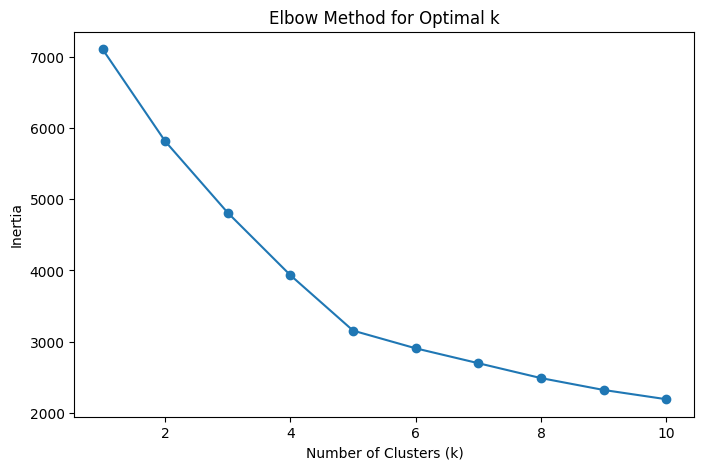

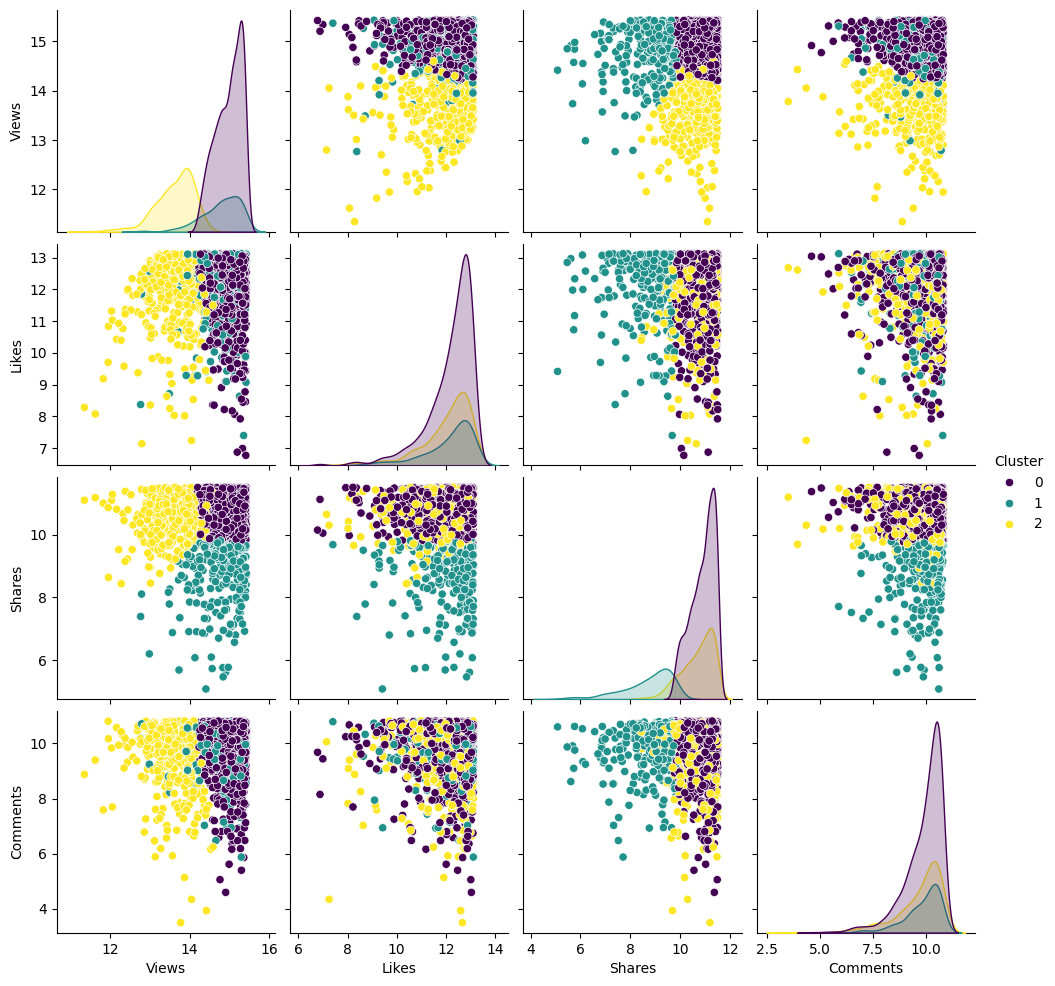

             Views      Likes     Shares  Comments
Cluster                                           
0        14.982032  12.184007  10.894169  9.883184
1        14.786681  12.099582   8.713217  9.822889
2        13.622128  12.009324  10.701324  9.649681


In [142]:
features = ['Views', 'Likes', 'Shares', 'Comments']

# Standardize data (K-Means is sensitive to scale)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with optimal k (choose from elbow method)
optimal_k = 3  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
sns.pairplot(df, hue='Cluster', diag_kind='kde', vars=features, palette='viridis')
plt.show()

# Show cluster-wise engagement statistics
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

             Views      Likes     Shares  Comments
Cluster                                           
0        14.982032  12.184007  10.894169  9.883184
1        14.786681  12.099582   8.713217  9.822889
2        13.622128  12.009324  10.701324  9.649681


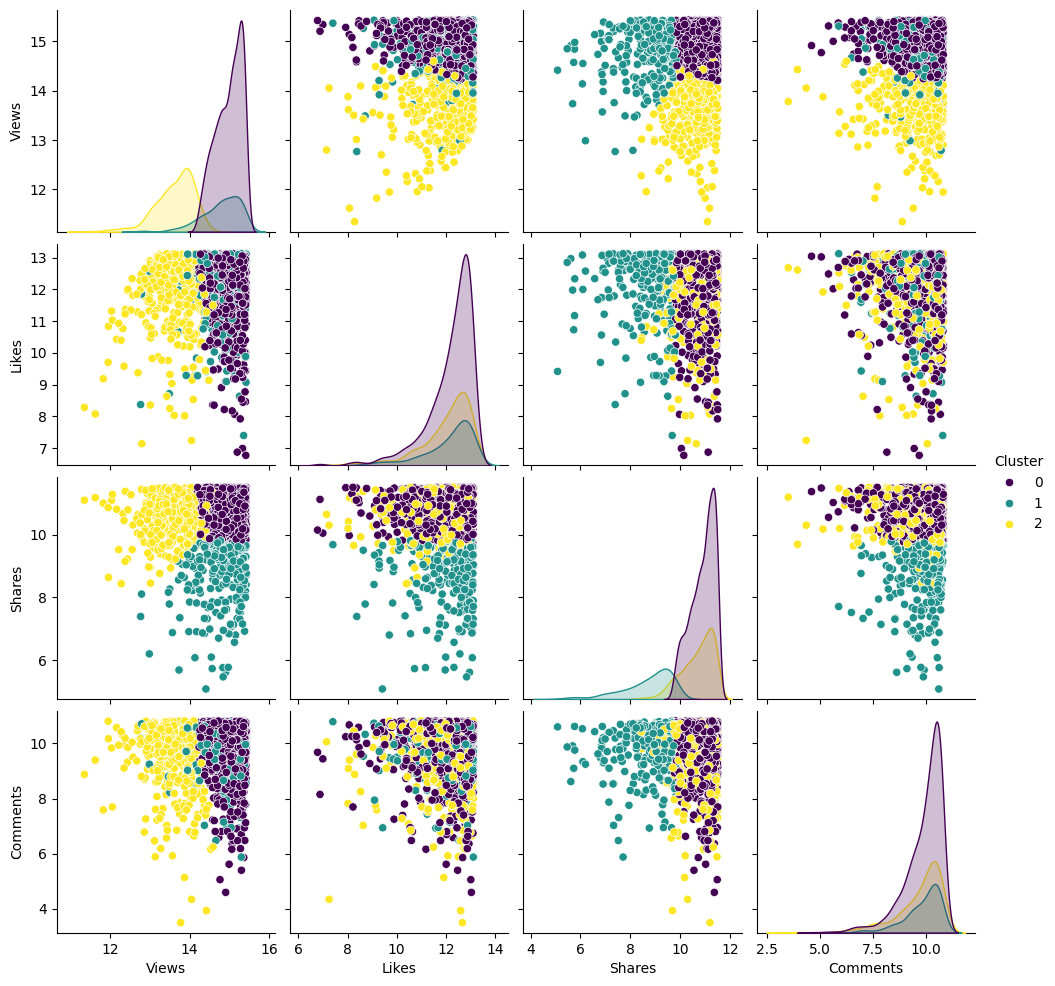

             Views      Likes     Shares  Comments  Engagement_Rate
Cluster                                                            
0        14.982032  12.184007  10.894169  9.883184         2.201401
1        14.786681  12.099582   8.713217  9.822889         2.073896
2        13.622128  12.009324  10.701324  9.649681         2.378310


In [143]:
engagement_metrics = df[['Views', 'Likes', 'Shares', 'Comments']]

# Scale the data for better clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(engagement_metrics)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate mean values for each cluster
cluster_summary = df.groupby('Cluster')[['Views', 'Likes', 'Shares', 'Comments']].mean()
print(cluster_summary)

# Visualize the Clusters
sns.pairplot(df, hue='Cluster', vars=['Views', 'Likes', 'Shares', 'Comments'], palette='viridis')
plt.show()

# Optional: Add Engagement Rate
df["Engagement_Rate"] = (df["Likes"] + df["Shares"] + df["Comments"]) / df["Views"]
cluster_summary["Engagement_Rate"] = df.groupby("Cluster")["Engagement_Rate"].mean()
print(cluster_summary)

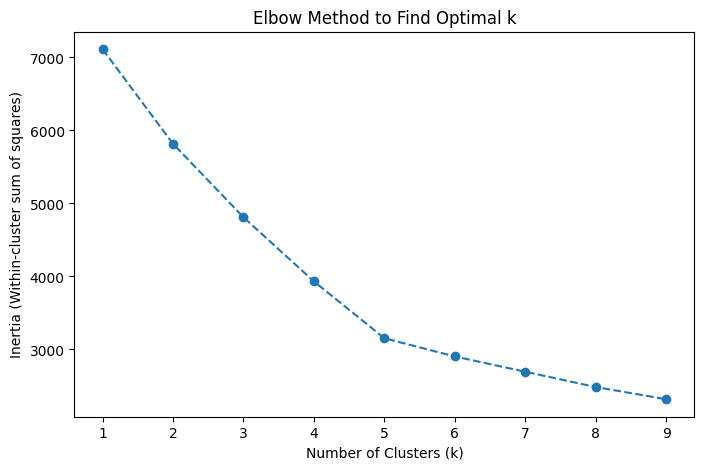

             Views      Likes     Shares   Comments  Engagement_Rate
Cluster                                                             
0        14.797545  12.340807   8.379206   9.835838         2.066787
1        14.661843  12.304151  10.730015   7.725761         2.101439
2        14.668798   9.998220  10.560381   9.990766         2.086481
3        14.970660  12.460972  10.853831  10.151035         2.236695
4        13.582641  12.243405  10.663033  10.048602         2.428183


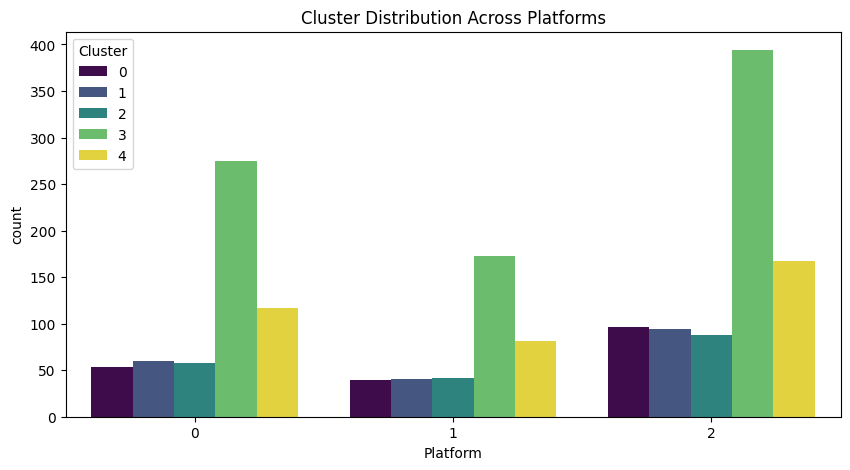

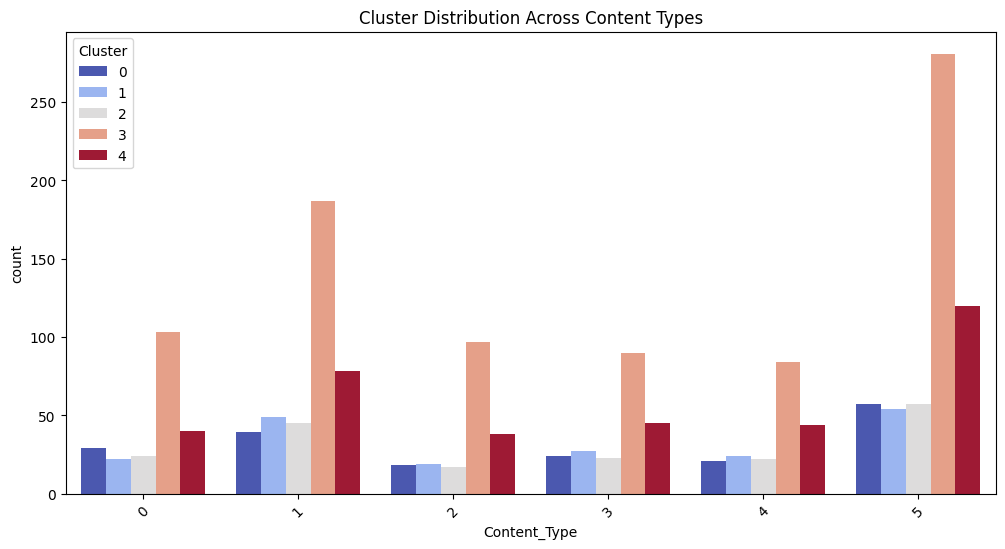

      Platform  Hashtag  Content_Type  Virality_Score
1790         0        5             2        0.897895
290          0        3             5        0.894139
1583         2        3             1        0.883659
1995         2        9             3        0.883637
2794         2        2             0        0.883424
4372         2        8             0        0.881458
4407         0        4             1        0.881192
2030         0        7             2        0.880772
670          2        4             3        0.877166
519          2        4             0        0.876031


<ipython-input-152-bf5fc4300093>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Virality_Score", data=df, palette="pastel")


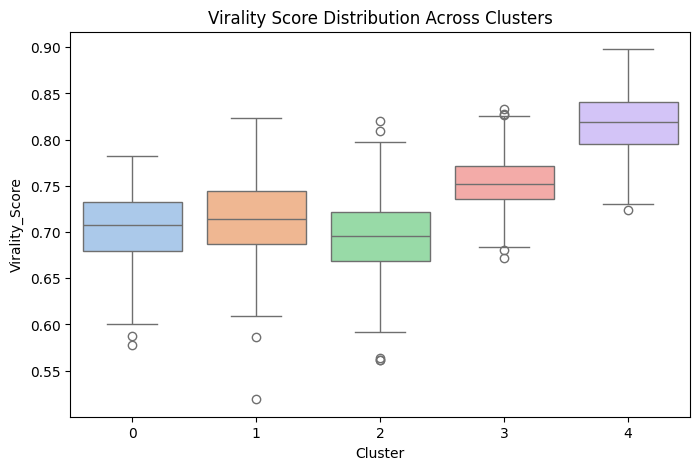

In [152]:
# Standardize numerical features
features = ['Views', 'Likes', 'Shares', 'Comments']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# 🔹 Step 1: Find Optimal Clusters using Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method to Find Optimal k")
plt.show()

# 🔹 Step 2: Apply K-Means Clustering with optimal k (let's assume k=3)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# 🔹 Step 3: Analyze Cluster Characteristics
cluster_summary = df.groupby("Cluster")[["Views", "Likes", "Shares", "Comments"]].mean()
df["Engagement_Rate"] = (df["Likes"] + df["Shares"] + df["Comments"]) / (df["Views"] + 1e-9)  # Avoid division by zero
cluster_summary = df.groupby("Cluster")[["Views", "Likes", "Shares", "Comments", "Engagement_Rate"]].mean()
print(cluster_summary)

# 🔹 Step 4: Cluster Trends by Platform & Content Type
plt.figure(figsize=(10, 5))
sns.countplot(x="Platform", hue="Cluster", data=df, palette="viridis")
plt.title("Cluster Distribution Across Platforms")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x="Content_Type", hue="Cluster", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Cluster Distribution Across Content Types")
plt.show()

# 🔹 Step 5: Feature Engineering - Virality Score
df["Virality_Score"] = (df["Likes"] * 0.4) + (df["Shares"] * 0.3) + (df["Comments"] * 0.3)
df["Virality_Score"] = df["Virality_Score"] / df["Views"]  # Normalize by Views

# Print top viral posts
top_viral_posts = df.sort_values("Virality_Score", ascending=False).head(10)
print(top_viral_posts[["Platform", "Hashtag", "Content_Type", "Virality_Score"]])

# 🔹 Step 6: Visualize Virality Score per Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x="Cluster", y="Virality_Score", data=df, palette="pastel")
plt.title("Virality Score Distribution Across Clusters")
plt.show()